<a href="https://colab.research.google.com/github/surajjorwar/Insurance-data-analysis/blob/main/insurance_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/my_drivee/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# basic understanding of age

print("the  average age of people is" , df['age'].mean())
print("the  maximum age of person is" , df['age'].max())
print("the  minimum age of person is" , df['age'].min())

the  average age of people is 39.20702541106129
the  maximum age of person is 64
the  minimum age of person is 18


In [8]:
#understanding gender
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
#understanding bmi = body mass index  ## ideally the bmi should be in between 18.5 to 24.9
print("the average bmi is : " ,df['bmi'].mean() )
print("the minimum bmi is : " ,df['bmi'].min() )
print("the maximum bmi is : " ,df['bmi'].max() )

the average bmi is :  30.66339686098655
the minimum bmi is :  15.96
the maximum bmi is :  53.13


In [11]:
#children-->Number of children covered by health insurance
df['children'].max()
print("the average bmi is : " ,df['children'].mean() )
print("the minimum bmi is : " ,df['children'].min() )
print("the maximum bmi is : " ,df['children'].max() )

the average bmi is :  1.0949177877429
the minimum bmi is :  0
the maximum bmi is :  5


In [12]:
#smoker

In [13]:
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
#region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
#charges Individual medical costs billed by health insurance
print("the average charge is : " ,df['charges'].mean())
print("the minimum charge is : " ,df['charges'].min())
print("the maximum charge is : " ,df['charges'].max() )

the average charge is :  13270.422265141257
the minimum charge is :  1121.8739
the maximum charge is :  63770.42801


# **questions and solutions**

#1. What is the average medical cost for the entire customer base?

In [18]:
print("the average medical cost of the entire medical base is  : " ,df['charges'].mean())

the average medical cost of the entire medical base is  :  13270.422265141257


#2. How does the distribution of medical costs vary across different age groups?

In [19]:
df1 =df

In [20]:
# creating Agegroup  column
df1.loc[(df1['age'] <= 25),  'AgeGroup'] = '1'
df1.loc[(df1['age'] > 25) & (df1['age'] <= 35),  'AgeGroup'] = '2'
df1.loc[(df1['age'] > 35) & (df1['age'] <= 45),  'AgeGroup'] = '3'
df1.loc[(df1['age'] > 45) & (df1['age'] <= 55),  'AgeGroup'] = '4'
df1.loc[(df1['age'] > 55),  'AgeGroup'] = '5'


In [21]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,AgeGroup
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


In [22]:
df1['AgeGroup'].value_counts()

1    306
4    284
2    268
3    264
5    216
Name: AgeGroup, dtype: int64

<BarContainer object of 1338 artists>

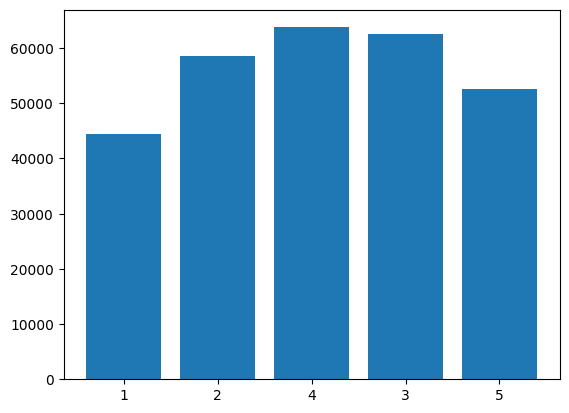

In [23]:
plt.bar(df1['AgeGroup'],df['charges'])

<function matplotlib.pyplot.show(close=None, block=None)>

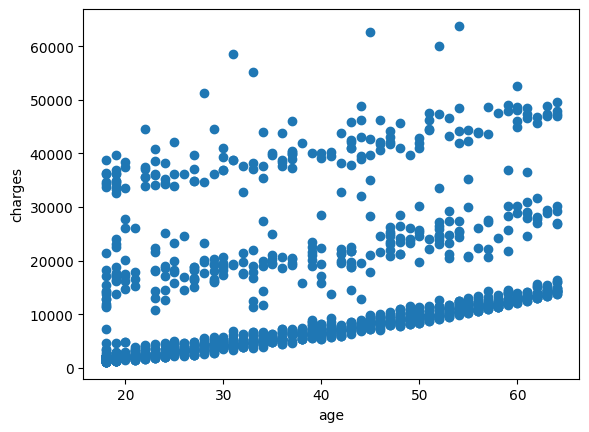

In [24]:
plt.scatter(df1['age'],df['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.show

here we have created 5 age groups
                     under 25,
                     25 to 35,
                     35 to 45,
                     45 to 55,
                     above 55,
and we have taken the sum of charges of a perticular age group and according to that we can see that the age group above 25 have higher charges than the age group below 25
by this insight we can conclude that as the age increases the charges are also increases
by observing the scatter plot we can se that as the age increases the minimum charge is also increases

# 3.**Are there any significant differences in medical costs between male and female customers?**

In [25]:
df.groupby('sex')['charges'].sum()/100000

sex
female    83.210612
male      94.347638
Name: charges, dtype: float64

in this data set the difference between the strength of male and females is 14 but the cost difference is 10lakh +  which is very huge
therefore males medical cost is higher than females

# 4.**Is there a correlation between BMI and medical costs? If so, how strong is the relationship?**

In [26]:
df2 = df[['bmi' , 'charges']]

In [27]:
correlation_matrix = df2.corr()


In [28]:
correlation_matrix

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


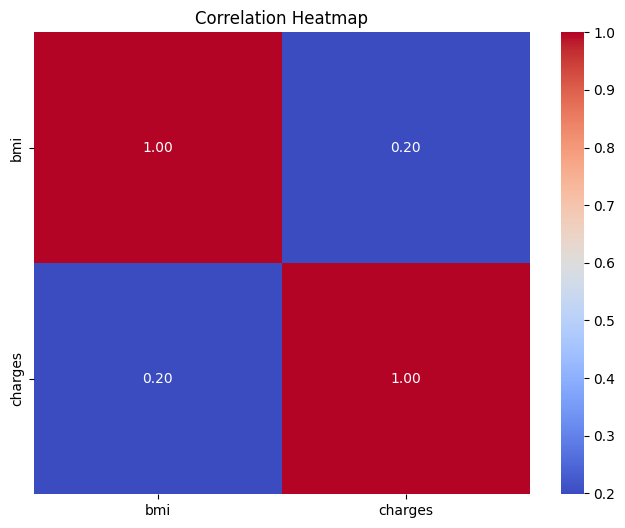

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

their is a positive correlation between bmi and charges but the relation is very week  as the corelation is just 0.2

# 5.**How do medical costs differ between smokers and non-smokers?**

In [30]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [31]:
df.groupby('smoker')['charges'].sum()/100000

smoker
no     89.740615
yes    87.817635
Name: charges, dtype: float64

<BarContainer object of 1338 artists>

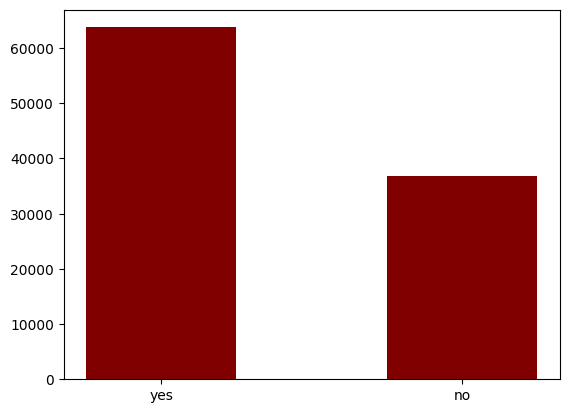

In [32]:

plt.bar(df['smoker'],df['charges'],width = 0.5,color = 'maroon')

their is a huge difference of cost between smoker and non smoker
, the total count of smokers is just 274 but the sum of their medical charge is more then 87 lakh ;
the total count of non smokers is  1064 and the sum of their medical charge is 89 lakh ;
# **it means that one smokers medical cost is aproximately equal to 4 non smokers medical cost which is very huge difference **


##6. **What is the average medical cost for customers with different numbers of children or dependents?**

In [33]:
c_mean = df.groupby('children')['charges'].mean().reset_index()
print(c_mean)

   children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247


<BarContainer object of 6 artists>

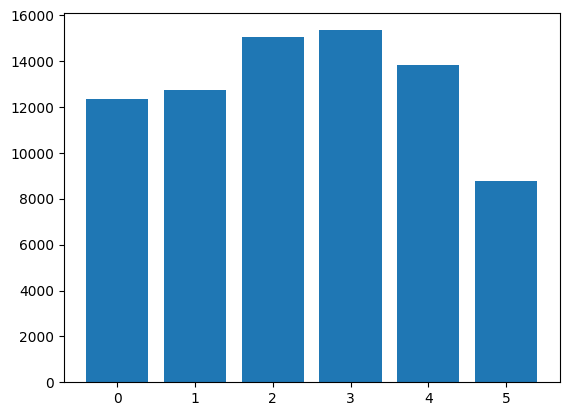

In [34]:
plt.bar(c_mean['children'],c_mean['charges'])

#7. **Which geographic region has the highest and lowest average medical costs?**

In [35]:
#Average Medical Cost = AMC
region_AMC=df.groupby('region')['charges'].mean().reset_index()
print(region_AMC)


      region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


<BarContainer object of 4 artists>

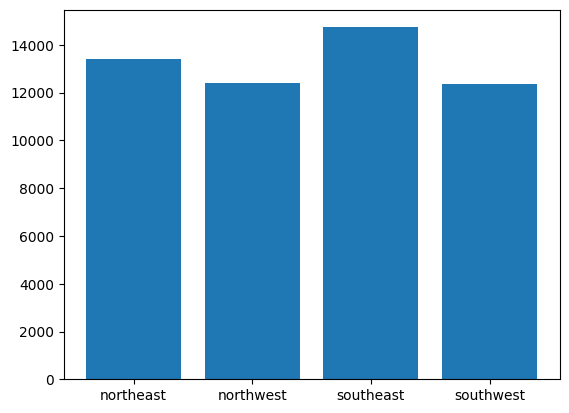

In [36]:
plt.bar(region_AMC['region'],region_AMC['charges'])

norteast has the highest average medical cost 13406 ;
southwest has the lowest average medical cost **12346**:
**the difference the highest and lowest average medical cost per region is  1060**

## 8.**Are there any outliers in the medical cost data, and if so, what could be the reasons for these extreme values?**

In [37]:
df5= df
df5 = df[df['charges']>35000]

In [38]:
df5.sort_values(by ='charges' )

,age,sex,bmi,children,smoker,region,charges,AgeGroup
917,45,male,22.895,0,yes,northeast,35069.37452,3
476,24,male,28.500,0,yes,northeast,35147.52848,1
242,55,female,26.800,1,no,southwest,35160.13457,4
322,34,male,30.800,0,yes,southwest,35491.64000,2
30,22,male,35.600,0,yes,southwest,35585.57600,1
...,...,...,...,...,...,...,...,...
819,33,female,35.530,0,yes,northwest,55135.40209,2
577,31,female,38.095,1,yes,northeast,58571.07448,2
1230,52,male,34.485,3,yes,northwest,60021.39897,4
1300,45,male,30.360,0,yes,southeast,62592.87309,3


<Axes: >

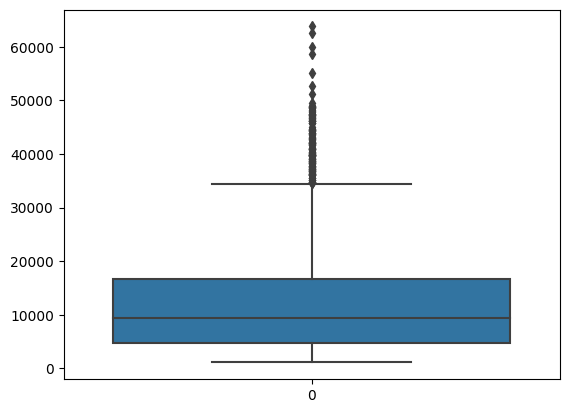

In [39]:
sns.boxplot(df['charges'])

In [40]:
df_outilers = df[df['charges']>35000]

In [41]:
df_outilers['smoker'].value_counts()

yes    130
no       3
Name: smoker, dtype: int64

In [42]:
df_outilers.head(130)

,age,sex,bmi,children,smoker,region,charges,AgeGroup
14,27,male,42.130,0,yes,southeast,39611.75770,2
19,30,male,35.300,0,yes,southwest,36837.46700,2
23,34,female,31.920,1,yes,northeast,37701.87680,2
29,31,male,36.300,2,yes,southwest,38711.00000,2
30,22,male,35.600,0,yes,southwest,35585.57600,1
...,...,...,...,...,...,...,...,...
1249,32,male,33.630,1,yes,northeast,37607.52770,2
1284,61,male,36.300,1,yes,southwest,47403.88000,5
1288,20,male,39.400,2,yes,southwest,38344.56600,1
1300,45,male,30.360,0,yes,southeast,62592.87309,3


# this box plot shows many outliers ,the outliers are charges  aprox above 35000,
## most of the outliers are males who smokes , the outliers who do not smokes are aged females

#** these are not outliers according to me because males smoking and womens age define why the cost of medical was higher **

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,AgeGroup
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


## 9. How many customers fall into different BMI categories (
# **Underweight: BMI less than 18.5 ,Normal weight: BMI between 18.5 and 24.9 , Overweight: BMI between 25 and 29.9 , Obese: BMI 30 or higher **

In [44]:
df_bmi = df

In [45]:
#creating new column which represent BMI categories
df_bmi.loc[(df_bmi['bmi'] < 18.5),  'bmi_categories'] = 'under weight'
df_bmi.loc[(df_bmi['bmi'] >= 18.5) & (df_bmi['bmi'] <= 24.9),  'bmi_categories'] = 'normal weight'
df_bmi.loc[(df_bmi['bmi'] >=25) & (df_bmi['bmi'] <= 29.9),  'bmi_categories'] = 'over weight'
df_bmi.loc[(df_bmi['bmi'] > 30),  'bmi_categories'] = 'obese'

In [46]:
df_bmi.head(2)

,age,sex,bmi,children,smoker,region,charges,AgeGroup,bmi_categories
0,19,female,27.90,0,yes,southwest,16884.9240,1,over weight
1,18,male,33.77,1,no,southeast,1725.5523,1,obese


In [47]:
value_counts = df_bmi['bmi_categories'].value_counts().sort_index()
value_counts

normal weight    222
obese            705
over weight      377
under weight      20
Name: bmi_categories, dtype: int64

In [48]:
df_bmi.groupby('bmi_categories')['charges'].sum()/100000

bmi_categories
normal weight     23.042489
obese            109.704531
over weight       41.447358
under weight       1.770440
Name: charges, dtype: float64

Text(0, 0.5, 'bmi categories count ')

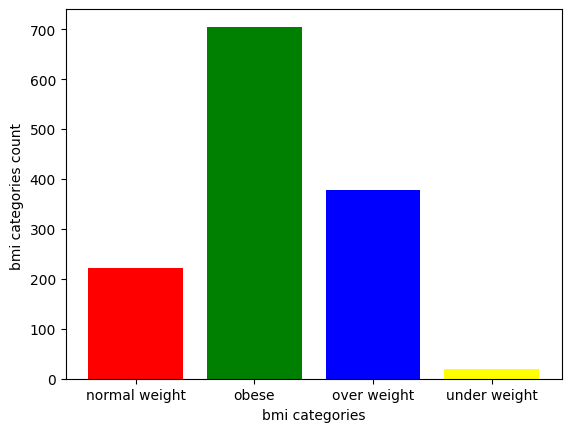

In [49]:
plt.bar(value_counts.index, value_counts.values,color = ['red','green','blue','yellow'])
plt.xlabel('bmi categories')
plt.ylabel('bmi categories count ')

# **bmi weight category count **
# normal weight  =  222 ;
# obese         =   705 ;
# over weight    =  377 ;
# under weight   =   20  

# 10. **Is there a relationship between age and the number of children covered by health insurance**

In [50]:
age_childrens = df[['age','children']]

In [51]:
correlation_matrix1 = age_childrens.corr()

In [52]:
correlation_matrix

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


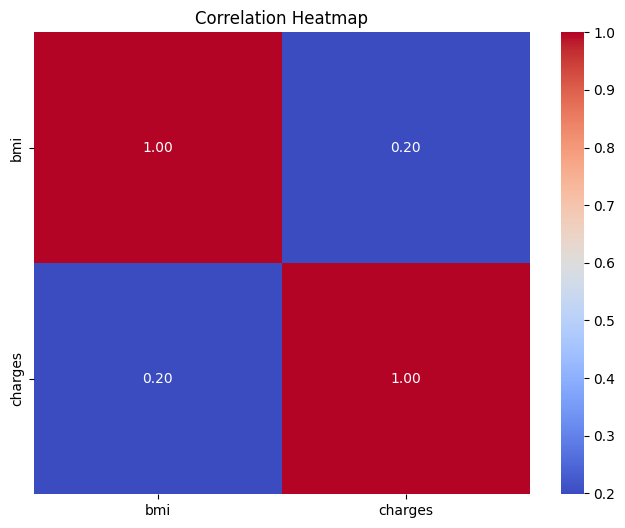

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# their is very poor relarion between children and age

#11. ***Which attributes (age, BMI, number of children, smoking status) have the most significant impact on medical costs?***

In [54]:
#to know this we have to see the correlation between these columns
# we have to convert categorical columns to numerical
df = df.iloc[:,:7]
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
df['sex'] = df['sex'].replace({'female':0,'male': 1})
df['smoker'] = df['smoker'].replace({'yes':1,'no': 0})


In [56]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [57]:
df_crr = df.drop('region',axis = 1 )


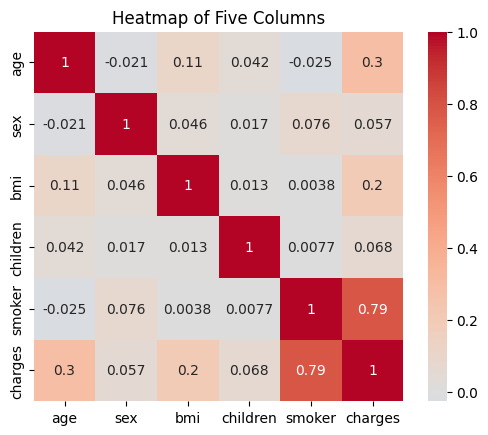

In [58]:
sns.heatmap(df_crr.corr(), annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Heatmap of Five Columns')
plt.show()

# **smoking is highly correlated with charges **
# which means it has most impact on the medical cost among all columns

# 12.**What is the proportion of smokers in different geographic regions?**

In [59]:
smokers_reg = df[df['smoker']=='1']

In [60]:
df.groupby('region')['smoker'].sum()

region
northeast    67
northwest    58
southeast    91
southwest    58
Name: smoker, dtype: int64

# south east has maximum no of smokers